In [2]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
import math
from neurodiffeq.monitors import Monitor1D
import IPython

In [3]:
m=2

Training Progress:   0%|                               | 0/1000 [00:00<?, ?it/s]

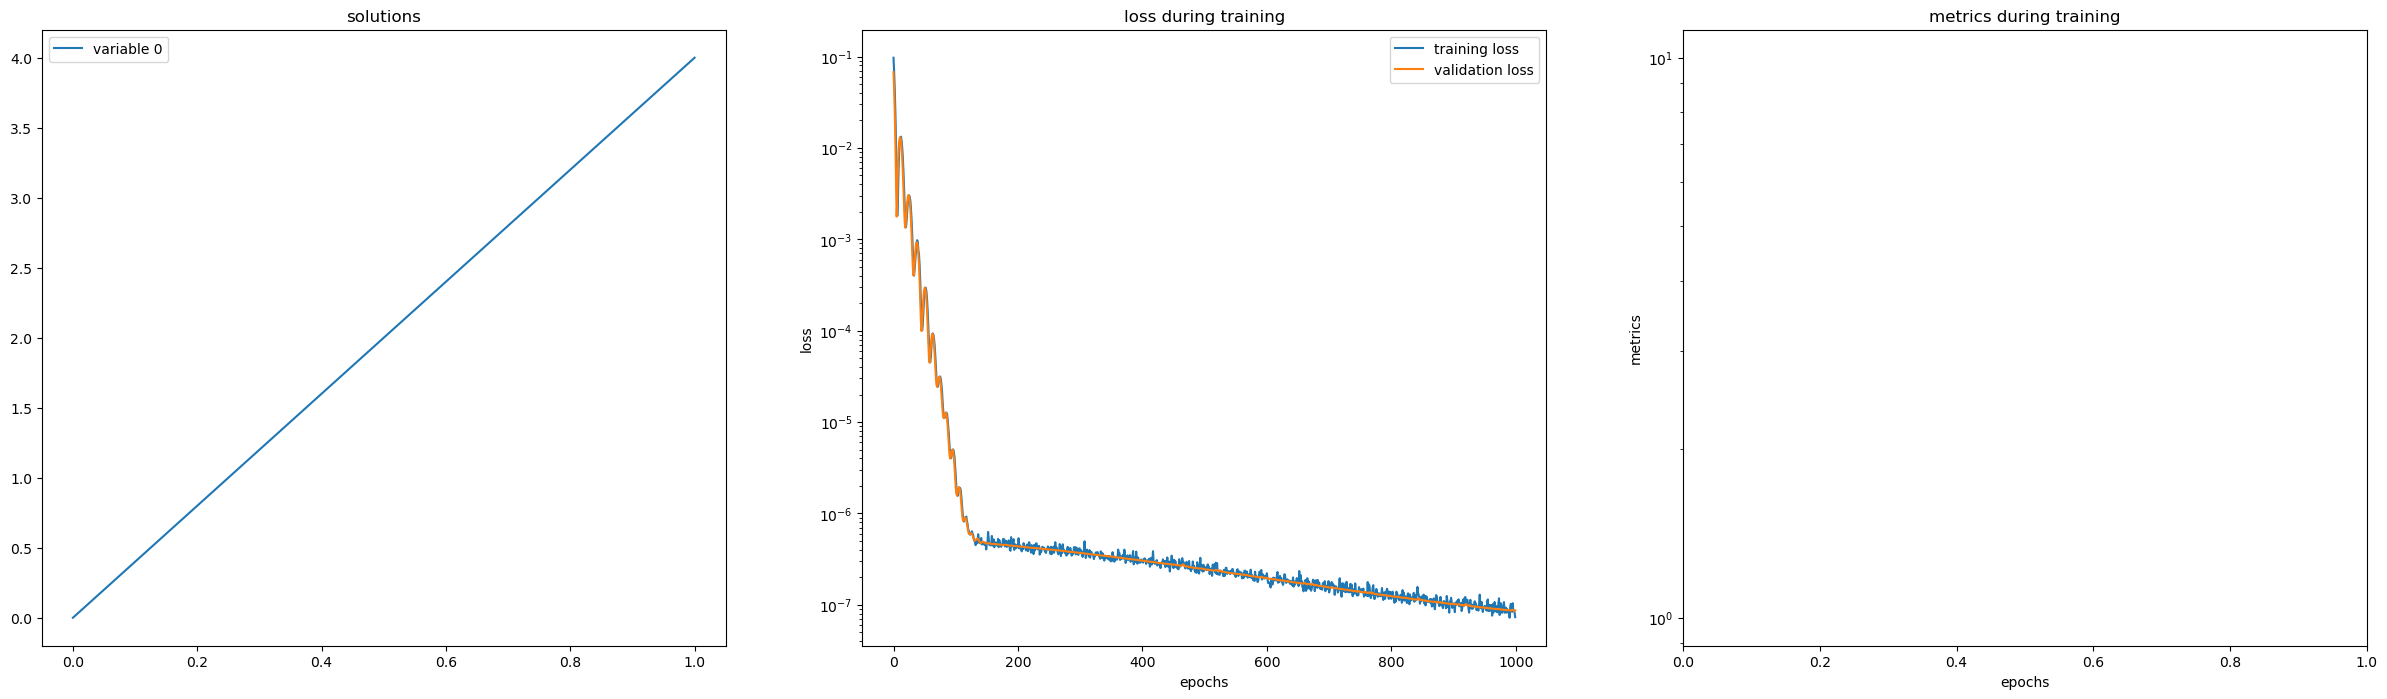

In [4]:
def ode_system(h,t):
    return [diff(h,t,order=2)]

conditions = [IVP(t_0=0.0, u_0=0.0, u_0_prime=2*m)]
nets = [FCNN(actv=SinActv)]
monitor = Monitor1D(t_min=0, t_max=1, check_every=1000)
solver = Solver1D(ode_system, conditions, t_min=0, t_max=1, nets = nets)
solver.fit(max_epochs=1000, callbacks = [monitor.to_callback()])
solution = solver.get_solution()

In [5]:
t = np.linspace(0, 1, 1000)
h_nn = solution(t, to_numpy=True)

In [6]:
h_an = 2*m*t

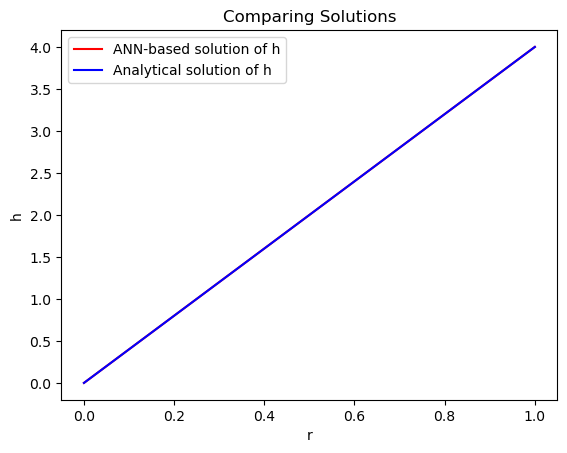

In [10]:
plt.title("Comparing Solutions")
plt.ylabel('h')
plt.xlabel('r')
plt.plot(t, h_nn, label='ANN-based solution of h', color = 'r')
plt.plot(t, h_an,label='Analytical solution of h', color = 'b')
plt.legend()
plt.show()

In [27]:
error = np.sqrt(np.mean((h_nn-h_an)**2))
print("Mean square error in h is", error)

Mean square error in h is 6.654721390642541e-06


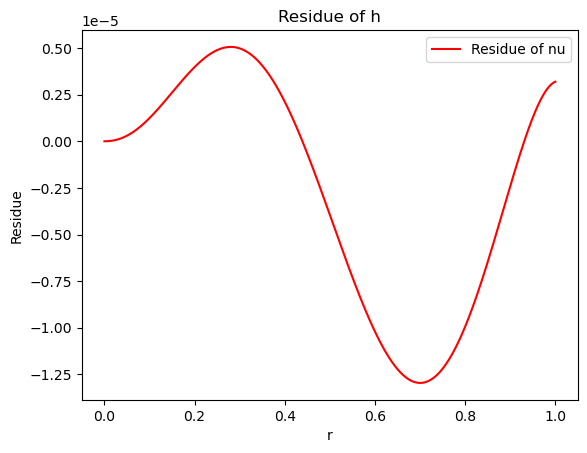

In [28]:
plt.title("Residue of h")
plt.ylabel('Residue')
plt.xlabel('r')
plt.plot(t, h_nn-h_an, label='Residue of nu', color = 'r')
plt.legend()
plt.savefig('RNResidue')
plt.show()